In [1]:
import argparse
import os
import shlex
import sys
from pprint import pformat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
from tensorflow import keras

from augmentation import c as aug_levels
from lib.keras_tb_logger import TensorBoard_Logger, gpu_temp_logger, lr_logger
from lib.utils import (
    create_dir,
    fix_random_seed,
    read_json,
    save_keras_model,
    write_json,
)
from src.config import c
from src.generator import Generator
from src.models import Wave_Model_Builder
from src.services import get_msg_provider, get_wave_provider

In [2]:
mb = Wave_Model_Builder(
    n_classes=100,
    wave_len_samples=32000 * 5,
    wave_sample_rate=32000,
    n_fft=2048,
    spec_power=3,
    body="ResNet50",
    imagenet_weights=False,
    extra_dense_layers=None,
    dropout=None,
)

In [3]:
m = mb.build()

In [4]:
save_keras_model(m, "model.png", dpi=75, rankdir="LR")

In [5]:
keras.backend.clear_session()

In [6]:
m2 = keras.models.Model(
    inputs=m.inputs,
    outputs=m.outputs + [m.get_layer("float2d_to_float_rgb").output],
)

In [7]:
df = pd.read_pickle("/app/_work/dataset-C.pickle")
wave_p = get_wave_provider(c)

In [8]:
g = Generator(
    df=df,
    wave_provider=wave_p,
    batch_size=16,
)

In [9]:
x, _, _ = g.__getitem__(0)

In [10]:
y_p, msgs_rgb = m2.predict(x)

In [11]:
msgs_rgb.dtype

dtype('float32')

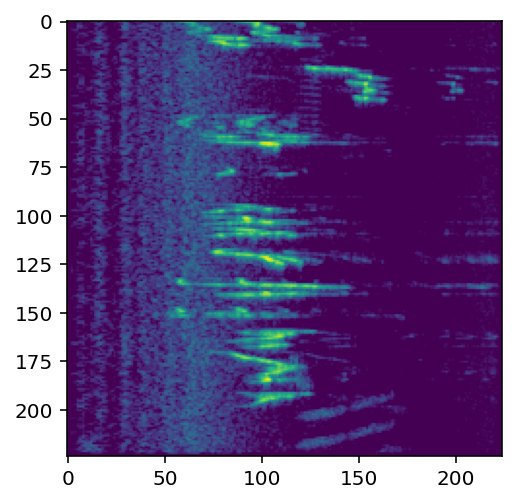

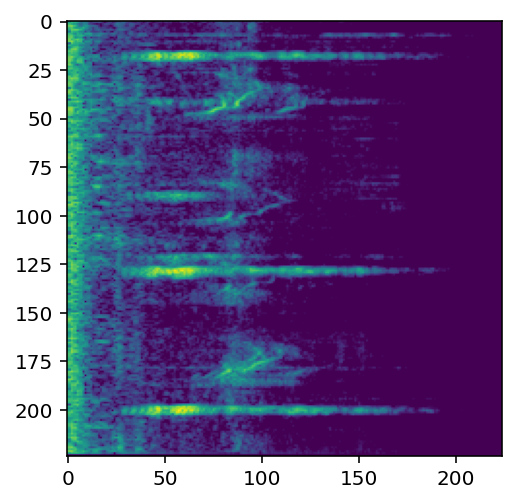

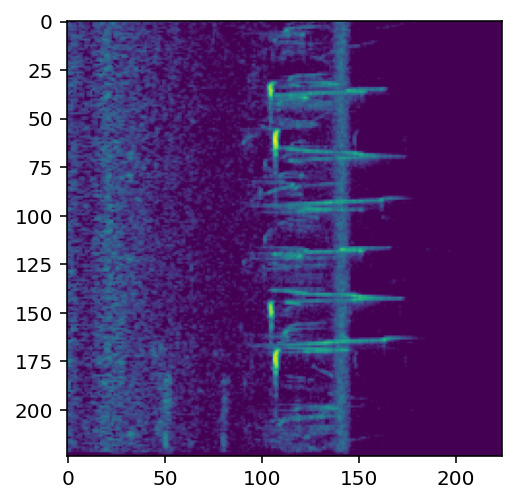

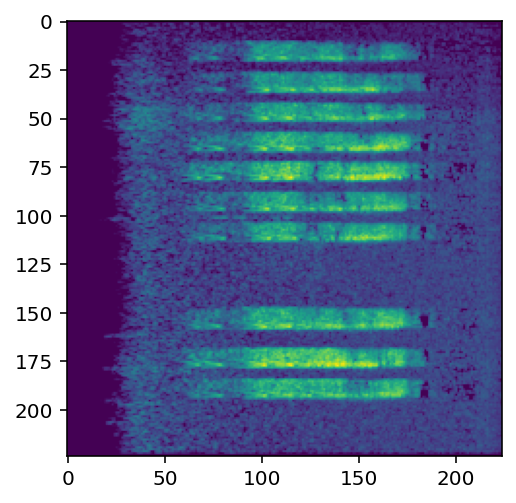

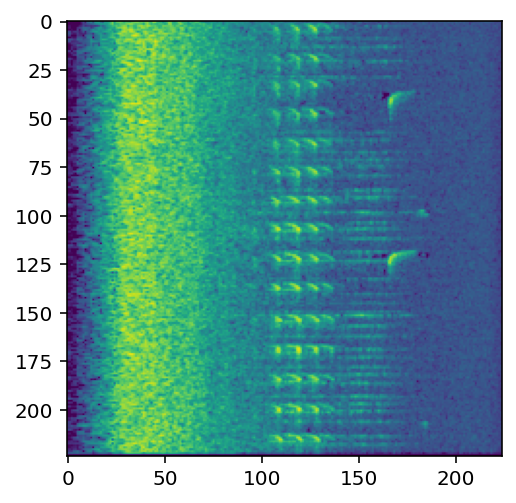

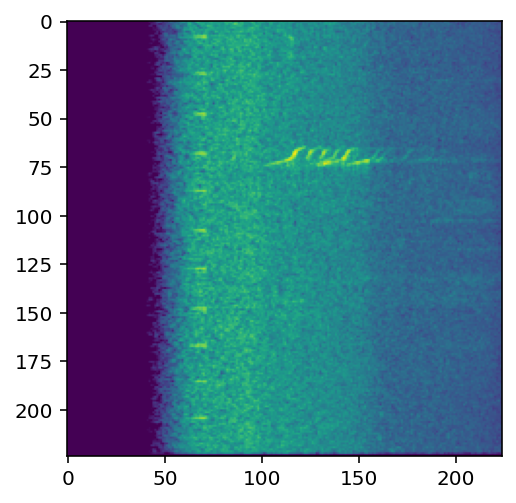

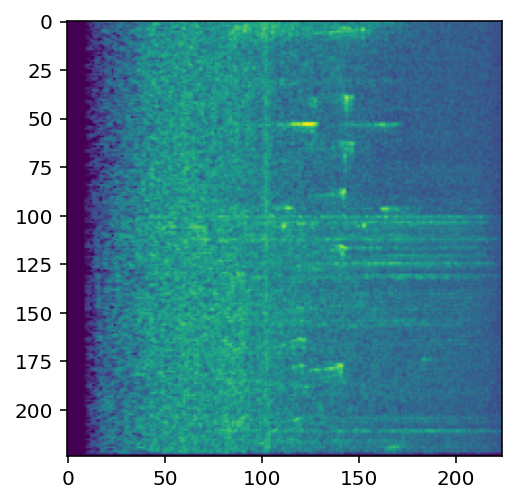

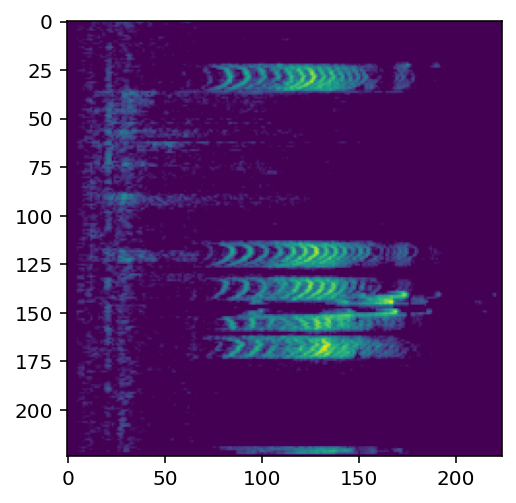

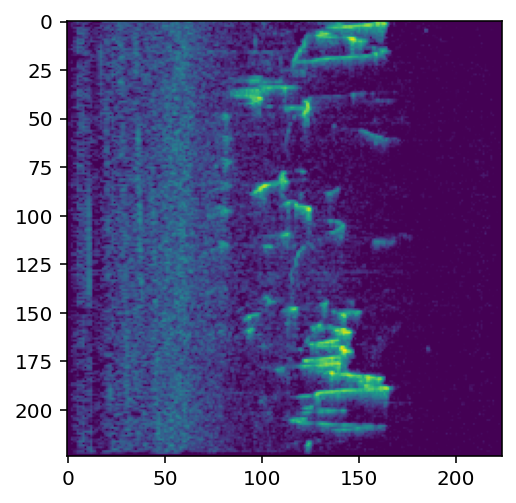

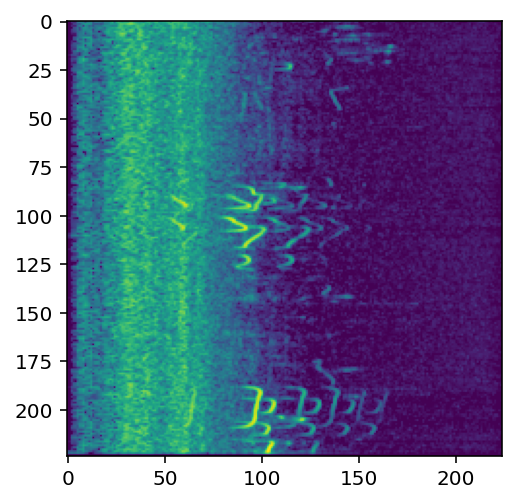

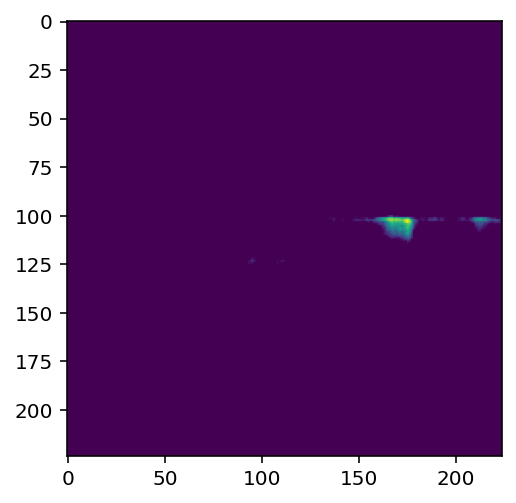

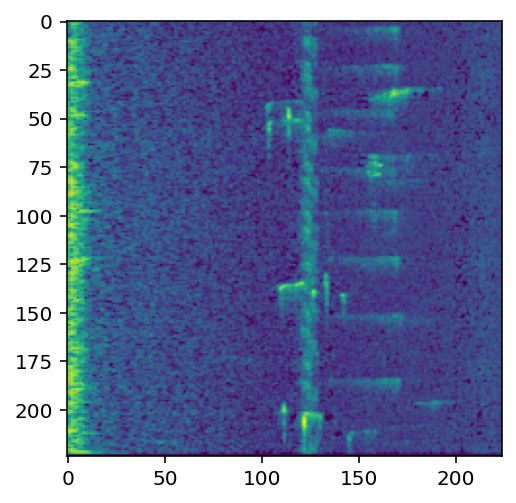

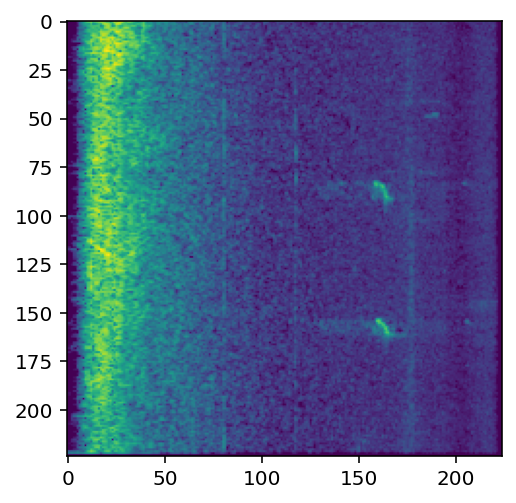

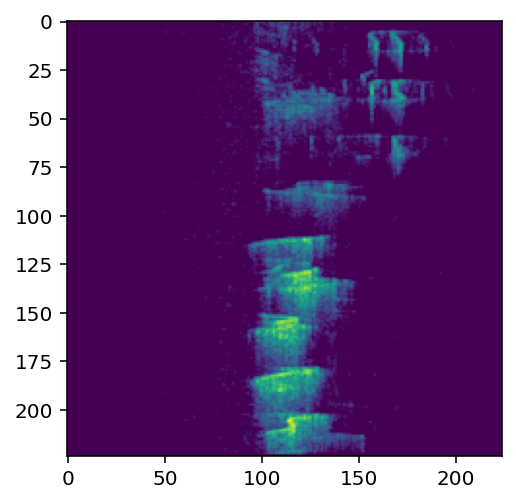

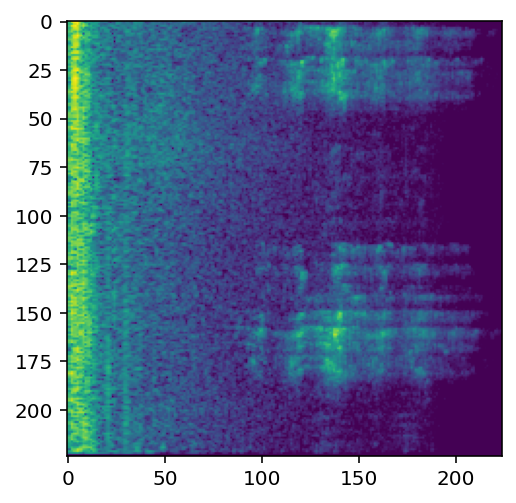

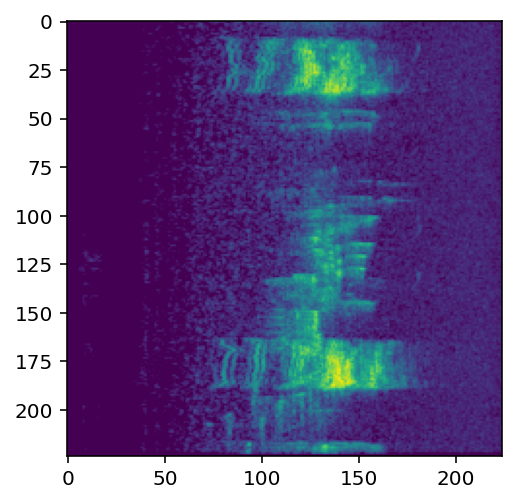

In [12]:
for msg_rgb in msgs_rgb:
    plt.figure()
    plt.imshow(msg_rgb[:, :, 0].astype(np.float32))